FFR 120  
Felix Waldschock

HW 4
Exercise 14.7
## Logistic growth model

In [435]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


# a.)
Solve the logistic equation by the finite-difference method, using the explicit Euler
integration method. Plot the solution obtained for different initial conditions x0, time steps Δt, and parameters r and K. Compare the result with figure 14.8. [Hint: Choose Δ≪ −r^-1 Why?]
 

In [436]:
# parameters
r = 0.1            #  r < 0
K = 2

# initial conditions
x0 = 0.1
dT = 0.05
tMax = 200
t0 = 0

N = int(tMax/dT)

In [437]:
def explicitEulerIntegration(x0, K, r, dT, N):
    # create arrays to store the position and velocity
    x = np.zeros(N)

    # set initial conditions
    x[0] = x0

    # use Euler's method to integrate the equations of motion
    for i in range(N-1):
            x[i+1] = x[i] + (r*x[i] * (1 - x[i]/K)) * dT
    return x


In [438]:
# Analytical expression of the Logisitc Growth Model
def AnalyticalLogisticGrowth(x0, r, K, t, t0):
    num = K
    den = 1 + ((K/x0) - 1) * np.exp(-r*(t-t0))
    return num/den

In [439]:
# compute X numerical
xExplicit = explicitEulerIntegration(x0, K, r, dT, N)

In [440]:
# compute X analytical
t = np.arange(0,tMax,dT)
xAnalytical = AnalyticalLogisticGrowth(x0, r, K, t, t0)

# b.)
Solve the model with Euler Implicit.  
Plot the solutions found for different x0, r, K and dT

In [441]:
def Estimator(x, r, K, dT):
    term1 = (1 - r * dT)
    num = (- term1) + np.sqrt((term1)**2 + 4 * r * dT * (x/K))
    den = 2 * r * dT
    return K * num/den


In [442]:
def implicitEulerIntegration(x0, K, r, dT, N):
    # create arrays to store the position and velocity
    x = np.zeros(N)
    # set initial conditions
    x[0] = x0
    # use Euler's method to integrate the equations of motion
    for i in range(N-1):
            xTilde = Estimator(x[i], r, K, dT)
            x[i+1] = x[i] + (r*xTilde * (1 - xTilde/K)) * dT
    return x

In [443]:
# compute X numerical
xImplicit = implicitEulerIntegration(x0, K, r, dT, N)

# Visualize

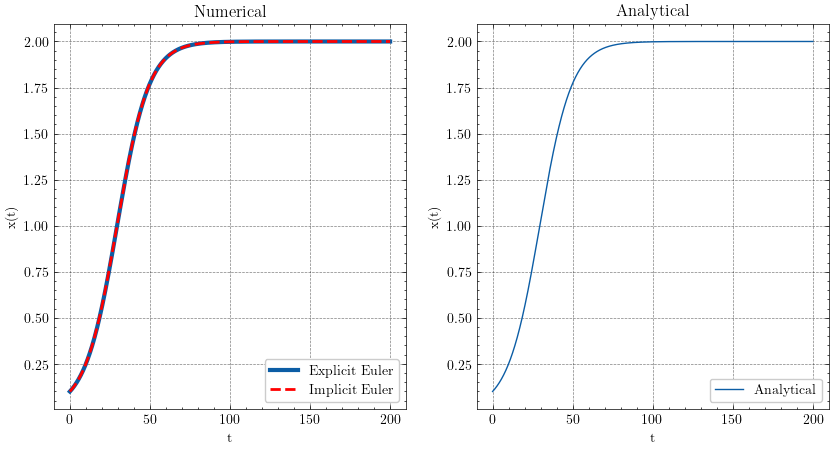

In [444]:
# subplot 1x2 with two numerical solutions to the left, and Analytical solution to the right
fig, ax = plt.subplots(1,2, figsize=(10,5))
t = np.arange(0,tMax,dT)

# plot numerical solutions
ax[0].plot(t, xExplicit, label='Explicit Euler', linewidth=3)

ax[0].plot(t, xImplicit, '--r', label='Implicit Euler', linewidth=2)
ax[0].set_xlabel('t')
ax[0].set_ylabel('x(t)')
ax[0].set_title('Numerical')
ax[0].legend()


# plot analytical solution

ax[1].plot(t, xAnalytical, label='Analytical')
ax[1].set_xlabel('t')
ax[1].set_ylabel('x(t)')
ax[1].set_title('Analytical')
ax[1].legend()


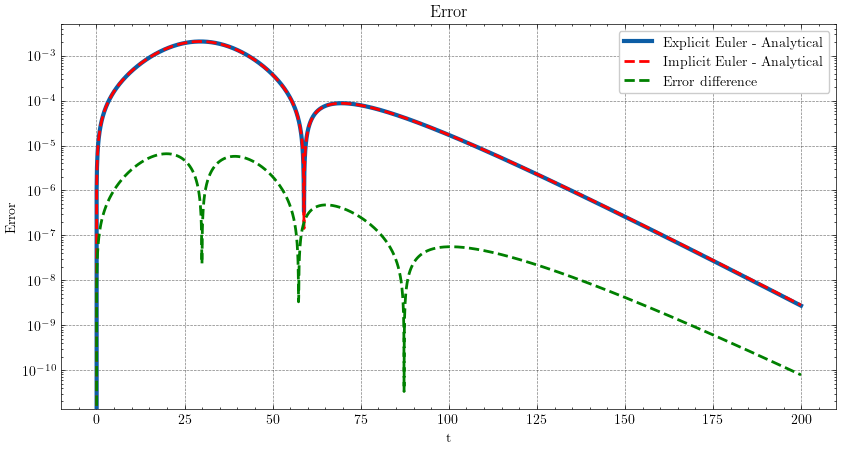

In [445]:
# plot the error between the numerical and analytical solutions
errorExplicit = np.abs(xExplicit - xAnalytical)
errorImplicit = np.abs(xImplicit - xAnalytical)
errorDelta = np.abs(errorExplicit - errorImplicit)

figure = plt.figure(figsize=(10,5))

plt.semilogy(t, errorExplicit, label='Explicit Euler - Analytical', linewidth=3)
plt.semilogy(t, errorImplicit, '--r', label='Implicit Euler - Analytical', linewidth=2)
plt.semilogy(t, errorDelta, '--g', label='Error difference', linewidth=2)
plt.xlabel('t')
plt.ylabel('Error')
plt.title('Error')
plt.legend()
plt.show()


# Compare the 2  models with various parameters

In [446]:
tMax = 100

dT_1 = 0.05
x0_1 = 2
K_1 = 5
r_1 = 0.05

X_Explicit_1 = explicitEulerIntegration(x0_1, K_1, r_1, dT_1, N)
X_Implicit_1 = implicitEulerIntegration(x0_1, K_1, r_1, dT_1, N)
X_Analytical_1 = AnalyticalLogisticGrowth(x0_1, r_1, K_1, t, t0)

### 
dT_2 = 0.01
x0_2 = 5
K_2 = 10
r_2 = 2

X_Explicit_2 = explicitEulerIntegration(x0_2, K_2, r_2, dT_2, N)
X_Implicit_2 = implicitEulerIntegration(x0_2, K_2, r_2, dT_2, N)
X_Analytical_2 = AnalyticalLogisticGrowth(x0_2, r_2, K_2, t, t0)

### 
dT_3 = 0.01
x0_3 = 10
K_3 = 20
r_3 = 0.2

X_Explicit_3 = explicitEulerIntegration(x0_3, K_3, r_3, dT_3, N)
X_Implicit_3 = implicitEulerIntegration(x0_3, K_3, r_3, dT_3, N)
X_Analytical_3 = AnalyticalLogisticGrowth(x0_3, r_3, K_3, t, t0)

###
dT_4 = 0.001
x0_4 = 8
K_4 = 20
r_4 = 3

X_Explicit_4 = explicitEulerIntegration(x0_4, K_4, r_4, dT_4, N)
X_Implicit_4 = implicitEulerIntegration(x0_4, K_4, r_4, dT_4, N)
X_Analytical_4 = AnalyticalLogisticGrowth(x0_4, r_4, K_4, t, t0)


# 
X_Explicit_ = [X_Explicit_1, X_Explicit_2, X_Explicit_3, X_Explicit_4]
X_Implicit_ = [X_Implicit_1, X_Implicit_2, X_Implicit_3, X_Implicit_4]
X_Analytical_ = [X_Analytical_1, X_Analytical_2, X_Analytical_3, X_Analytical_4]
dT_ = [dT_1, dT_2, dT_3, dT_4]
x0_ = [x0_1, x0_2, x0_3, x0_4]
K_ = [K_1, K_2, K_3, K_4]
r_ = [r_1, r_2, r_3, r_4]


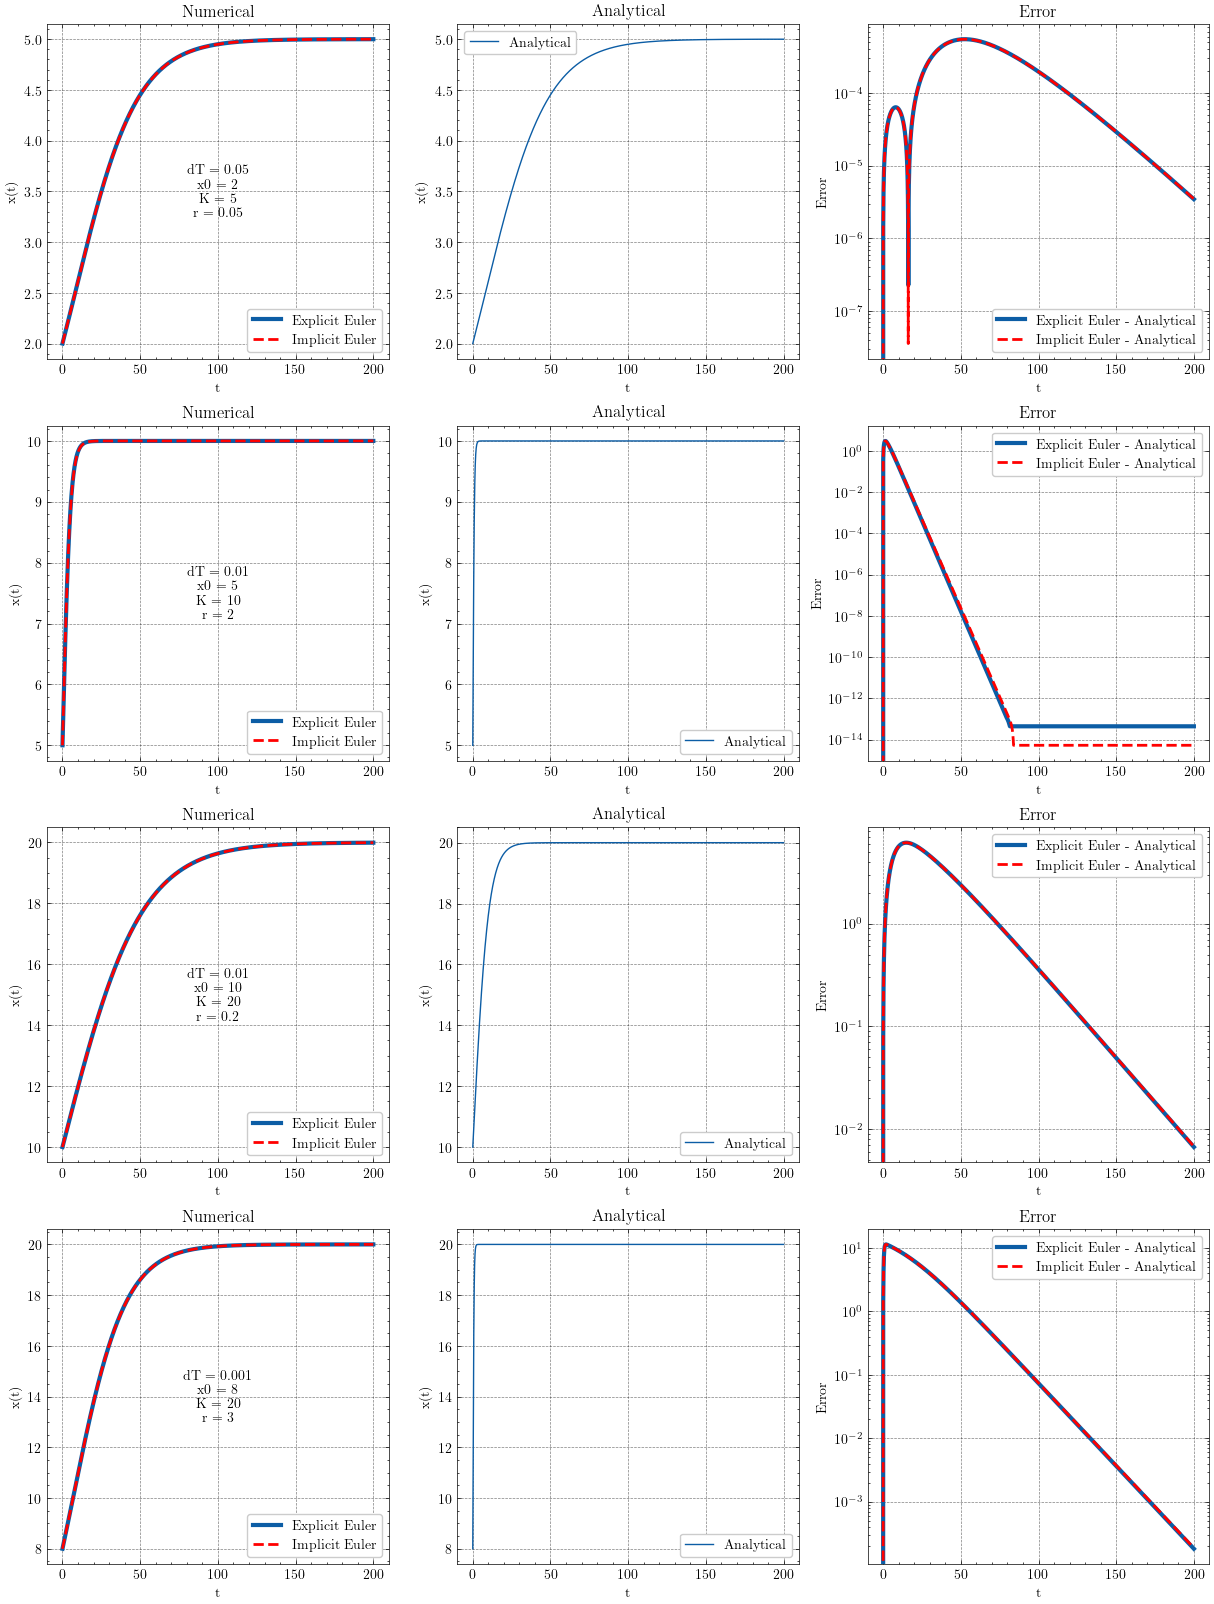

In [447]:
# Plot the numerical solutions
fig, ax = plt.subplots(4,3, figsize=(15,20))

for i in range(4):
    ax[i,0].plot(t, X_Explicit_[i], label='Explicit Euler', linewidth=3)
    ax[i,0].plot(t, X_Implicit_[i], '--r', label='Implicit Euler', linewidth=2)
    # write the parameters in the plot
    ax[i,0].text(0.5, 0.5, f'dT = {dT_[i]} \nx0 = {x0_[i]} \nK = {K_[i]} \nr = {r_[i]}', horizontalalignment='center', verticalalignment='center', transform=ax[i,0].transAxes)
    ax[i,0].set_xlabel('t')
    ax[i,0].set_ylabel('x(t)')
    ax[i,0].set_title('Numerical')
    ax[i,0].legend()

    ax[i,1].plot(t, X_Analytical_[i], label='Analytical')
    ax[i,1].set_xlabel('t')
    ax[i,1].set_ylabel('x(t)')
    ax[i,1].set_title('Analytical')
    ax[i,1].legend()

    # plot the error between the numerical and analytical solutions
    errorExplicit = np.abs(X_Explicit_[i] - X_Analytical_[i])
    errorImplicit = np.abs(X_Implicit_[i] - X_Analytical_[i])

    ax[i,2].semilogy(t, errorExplicit, label='Explicit Euler - Analytical', linewidth=3)
    ax[i,2].semilogy(t, errorImplicit, '--r', label='Implicit Euler - Analytical', linewidth=2)
    ax[i,2].set_xlabel('t')
    ax[i,2].set_ylabel('Error')
    ax[i,2].set_title('Error')
    ax[i,2].legend()